In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Clustering/C04_wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash_Alcanity,Magnesium,Total_Phenols,Color_Intensity,Hue,Proline
0,14.23,1.71,15.6,127,2.80,5.64,1.04,1065
1,13.20,1.78,11.2,100,2.65,4.38,1.05,1050
2,13.16,2.36,18.6,101,2.80,5.68,1.03,1185
3,14.37,1.95,16.8,113,3.85,7.80,0.86,1480
4,13.24,2.59,21.0,118,2.80,4.32,1.04,735


In [3]:
data = data.drop(['Malic_Acid','Ash_Alcanity','Magnesium', 'Color_Intensity', 'Hue', 'Proline'], axis=1)
data.head()

,Alcohol,Total_Phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80


Text(0.5, 0, 'Alcohol')

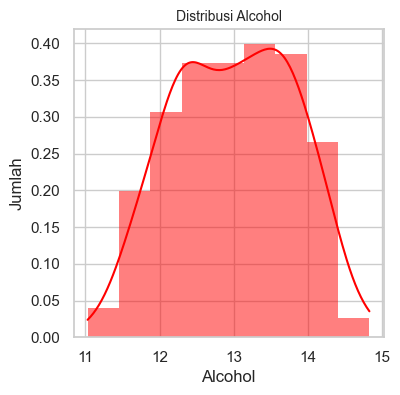

In [4]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['Alcohol'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi Alcohol', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('Alcohol')

Text(0.5, 0, 'Total_Phenols')

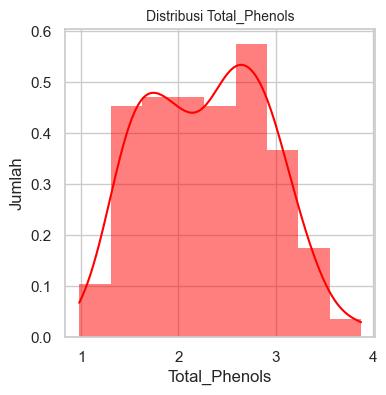

In [5]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['Total_Phenols'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi Total_Phenols', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('Total_Phenols')

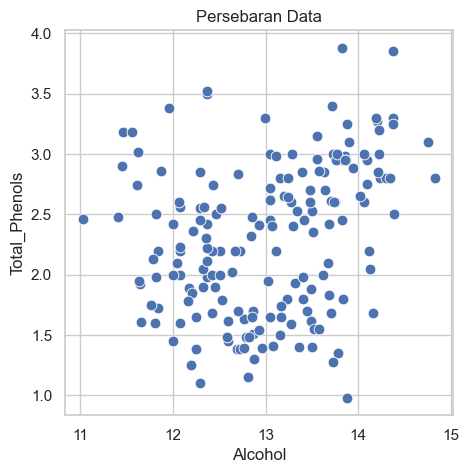

In [6]:
# Persebaran Data
plt.figure(figsize=(5,5))
sns.scatterplot(x='Alcohol', y='Total_Phenols', data = data, s = 60)
plt.title('Persebaran Data')
plt.show()

In [7]:
# hitung within cluster sum of squared error (WCSS) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(data)
    wcss.append(kmModel.inertia_)

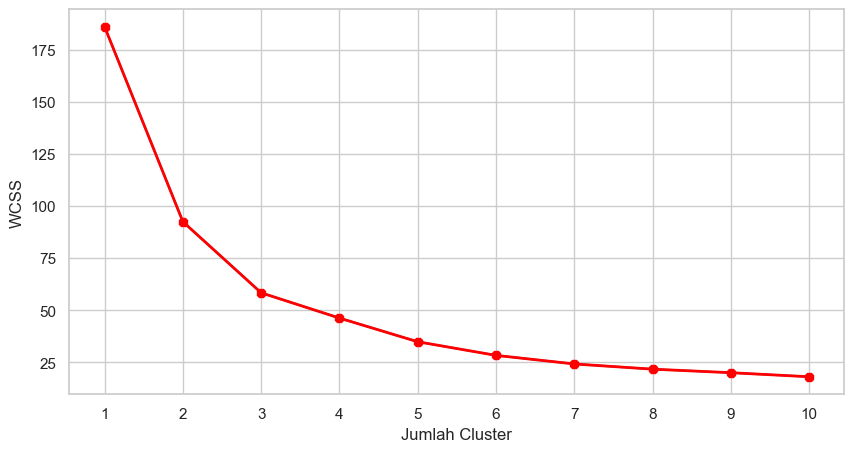

In [8]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [18]:
# model dengan 3 cluster
kmModelFix = KMeans(n_clusters=3, n_init=10)
kmModelFix.fit(data)

# memprediksi label
hasil_prediksi = kmModelFix.predict(data)
print(hasil_prediksi)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 2 1 2 1
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


In [19]:
data['label'] = hasil_prediksi
data.head()

,Alcohol,Total_Phenols,label
0,14.23,2.80,1
1,13.20,2.65,1
2,13.16,2.80,1
3,14.37,3.85,1
4,13.24,2.80,1


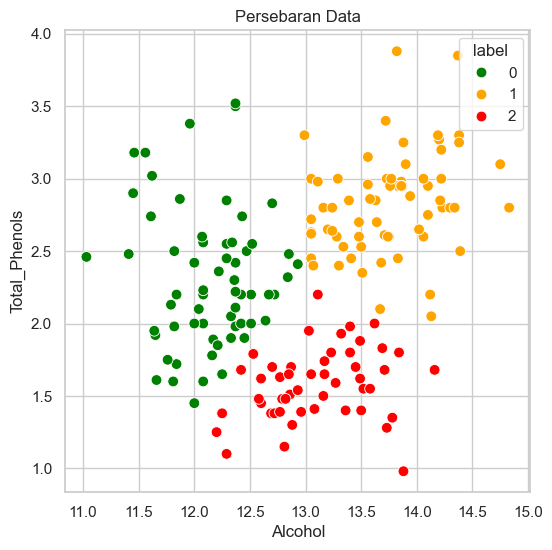

In [20]:
# Persebaran Data beserta labelnya
plt.figure(figsize=(6,6))
sns.scatterplot(x='Alcohol', y='Total_Phenols', hue='label',
                palette=['green', 'orange', 'red'], legend='full',
                data = data, s = 60)
plt.title('Persebaran Data')
plt.show()